In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
%matplotlib inline

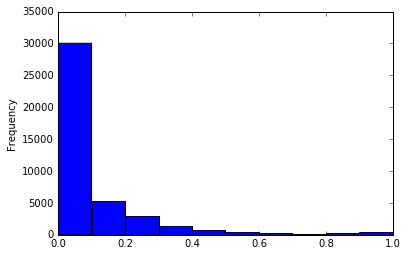

In [2]:
# Loading and Preprocessing of Data:
my_dat = pd.read_csv("assessment_challenge.csv")
my_dat = my_dat.dropna()
my_dat1 = my_dat.iloc[:,[1,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
X = my_dat1.iloc[:,1:14]
y = my_dat1.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train.plot.hist()

In [3]:
# Logistic regression need a categorical response variable. So we are dividing the read_rate into a 5 categories.
y_train_cat = pd.cut(y_train, 5)
y_test_cat = pd.cut(y_test, 5)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train_cat)
# predict class labels for the test set
predicted = model.predict(X_test)

In [5]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test_cat, predicted))

0.885615829257


In [6]:
y = pd.cut(y, 5)

In [7]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.88583333  0.85214202  0.88948158  0.88879627  0.88694347  0.88627647
  0.88692462  0.88390325  0.89241034  0.85221018]
0.880492153221
